# The numpy.ramdom package

### Programming for Data Analysis assessment 2019

## 1. Introduction
In this notebook I will explain the use of the numpy.random package in Python. It is organized into four distinct sections, each corresponding to a specific task as outlined in the assignment document. The accompanying README summarizes the findings of this investigation.

### Preliminaries

In [1]:
# Import required packages.
import matplotlib.pyplot as plt
import numpy as np
import math as m

# matplotlib settings.
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

***
## 2. The purpose of the numpy.random package

The numpy.random package is a group of functions that allow for efficient and fast generation of arrays containing samples of random numbers; these sample values can be drawn from many different types of probability distribution. It also contains functions for randomly shuffling the contents of arrays, and others which provide some control over the seed of the random number generator. 

***
## 3. Simple random data and Permutations

### 3.1 Simple random data

This part of the numpy.random package comprises a group of functions which are capable of generating some basic random number samples. They include:
- rand
- randn
- random_integers
- random_sample
- choice
- bytes

The very first function **rand** generates random numbers from a uniform distribution, in the interval $[0.0, 1.0)$. A uniform distribution implies that all numbers in the interval are equally likely to be picked. The interval as written here includes 0 but not 1. The random numbers can be generated in an array of specified size, or singly if no array size given.

In [2]:
# Generate a single random number.
np.random.rand()

0.134072404298071

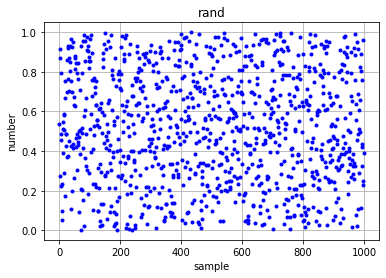

In [3]:
# Generate an array of random numbers, array size given as a parameter.
x1 = np.random.rand(1000)
plt.plot(x1, 'b.')
plt.title('rand')
plt.xlabel('sample')
plt.ylabel('number')
plt.grid()

Notice how the random numbers generated fill the range 0 to 1. 


Compare this with generating numbers from a different type of distribution, the standard normal distribution of mean 0 and variance 1, using **randn**. The mean is the average value. The variance measures now far the numbers are spread out from the mean in the distribution. 

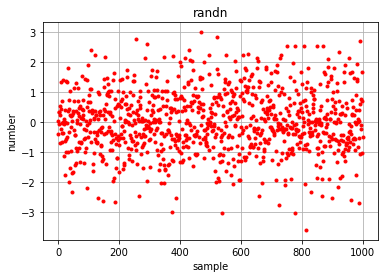

In [4]:
# Return numbers from a standard normal distribution with mean 0 and variance 1.
x2 = np.random.randn(1000)
plt.plot(x2, 'r.')
plt.title('randn')
plt.xlabel('sample')
plt.ylabel('number')
plt.grid()

Notice how these numbers are more bunched around zero, which is the default mean for randn.

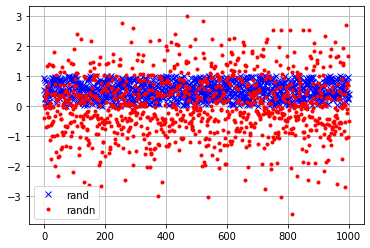

In [5]:
# Compare the two functions just used in a scatterplot.
plt.plot(x1, 'bx', label='rand')
plt.plot(x2, 'r.', label='randn')
plt.grid()
plt.legend()

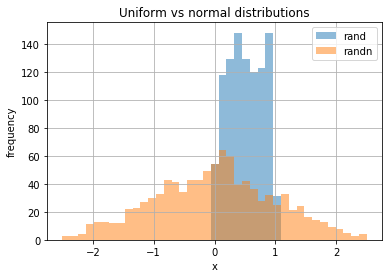

In [6]:
# Compare the two functions just used using histograms.
bins = np.linspace(-2.5, 2.5, 40)
plt.hist(np.random.rand(1000), bins, alpha=0.5, label='rand')
plt.hist(np.random.randn(1000), bins, alpha=0.5, label='randn')
plt.xlabel('x')
plt.ylabel('frequency')
plt.title('Uniform vs normal distributions')
plt.grid()
plt.legend(loc='upper right')

Once again notice how the generated numbers lie within a range and all have the same chance of being sampled when using **rand**. In contrast, the **randn** function generates numbers with a spread, so that numbers around the specified mean have highest frequency. We can manipulate the latter distribution to look more like the former by playing around with the parameters; shrink the variance to reduce the spread and offset the sample by the mean. The numbers are now drawn from a normal distribution $N(\mu, \sigma^2)$, where $\mu$ is the mean, $\sigma^2$ is the variance, and $\sigma$ is the standard deviation.

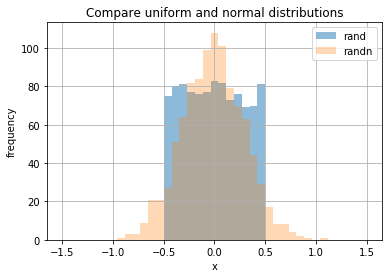

In [7]:
# Modify randn pars to shrink the spread and offset rand to have mean 0.
mu, sigma = 0.5, 0.3
bins = np.linspace(-1.5, 1.5, 40)
plt.hist(np.random.rand(1000) - mu, bins, alpha=0.5, label='rand') # mean 0.5
plt.hist(sigma * np.random.randn(1000), bins, alpha=0.3, label='randn') # mean = 0, variance 0.3
plt.xlabel('x')
plt.ylabel('frequency')
plt.title('Compare uniform and normal distributions')
plt.grid()
plt.legend(loc='upper right')

The package contains two functions for generating random integers, **randint** and **random_integers**. The documentation states that **random_integers** has been deprecated so we will only discuss **rantint**, which generates random integers in the interval $[low, high)$.

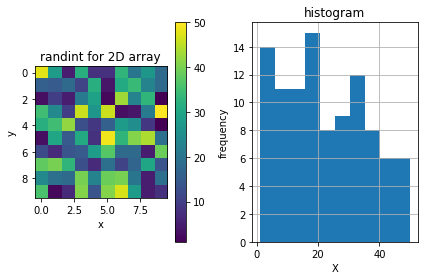

In [8]:
# Return a 10x10 array of random integers from low (inclusive) to high (exclusive).
high = 51; low = 0
a = np.random.randint(low, high, size=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(a)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('randint for 2D array')

# np.reshape() to straighten array
plt.subplot(1, 2, 2)
b = np.reshape(a, 100)
plt.hist(b)
plt.xlabel('X')
plt.ylabel('frequency')
plt.title('histogram')
plt.grid()

plt.tight_layout()

This function can be used to simulate rolling a six-sided die or tossing a fair coin. The die roll has 6 possible outcomes (the numbers 1 to 6) while the coin toss has only two (heads or tails represented by 1 and 0). 

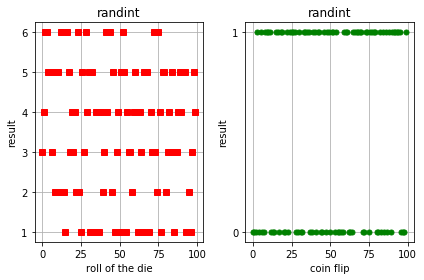

In [9]:
# Roll of a six-sided die.
d1 = np.random.randint(1, 7, 100)

plt.subplot(1, 2, 1)
plt.plot(d1, 'rs')
plt.title('randint')
plt.xlabel('roll of the die')
plt.ylabel('result')
plt.grid()

# Coin flip.
c1 = np.random.randint(0, 2, 100)

plt.subplot(1, 2, 2)
plt.plot(c1, 'go', markersize=5)
plt.title('randint')
plt.xlabel('coin flip')
plt.ylabel('result')
plt.grid()
plt.yticks(np.arange(2))

plt.tight_layout()

There are a number of functions which, on first glance, appear to do the same thing. Indeed, they (**random, ranf, sample**) are all aliases to the function **random_sample**. This function generates random floating point numbers in the half open interval $[0.0, 1.0)$. The numbers are drawn from a continuous uniform distribution.

In [10]:
# 2 x 5 array of random floats.
np.random.random_sample((2,5))

array([[0.16541848, 0.90438765, 0.43841945, 0.17676109, 0.27364837],
       [0.12005456, 0.61937478, 0.32438259, 0.98680874, 0.54944845]])

For example , if I wanted to use some of these functions to pick my Euromillions numbers, I might naively think to use the **randint** function. However, we need to be careful because this function allows for any number in the range to be chosen more than one time. This possibility for repetition would not necessarily be obvious on picking just five numbers. However, if the sample size is larger the repeated integers become visible. The correct function to use here would be **choice** with the replace keyword set to False. This function generates a random sample of specified size from a 1D array. The array does not have to contain integers, it could contain a list of names for example. 

In [11]:
# Return 5 random integers from low (inclusive) to high (exclusive); here [0,51)
np.random.randint(51, size=20)

array([25, 11, 41, 21, 25, 32, 17, 41, 32, 10,  3,  6, 19,  3,  1, 14, 11,
       49,  5, 14])

In [12]:
# Randomly select 20 numbers from a list, once a number is picked it can't be chosen again.
np.arange(1, 51) # list of integers from 1 to 50
np.random.choice(np.arange(1, 51), 20, replace=False)

array([24, 25, 36, 11, 31, 17,  3,  9, 45,  2, 23,  7, 26, 49,  4, 35, 15,
        1, 21, 37])

The last function in this part of the package is **bytes**, which returns a number of random bytes.

In [13]:
# Return 5 random bytes.
np.random.bytes(5)

b'<\x0f\xaf\x00H'

### 3.2 Permutations

A permutation is the particular order of a set of elements. The functions in this part of the package allow one to re-order lists and arrays; they are:
- shuffle
- permutation

**shuffle** shuffles the contents of an array or a list. If the array has 2 dimensions, this function shuffles the rows but the order of the elements in each row are *not* changed by the process. Beware, the list itself is modified by the process of shuffling.

In [14]:
# Shuffle a simple list.
x = np.arange(15) # list
print("original list", x)
np.random.shuffle(x) # shuffle it
print("shuffled list", x)

original list [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
shuffled list [ 2  8  1 10  6  9 11  4 13  3 12  0 14  5  7]


In [15]:
# Shuffle a 2D array.
y = np.arange(15).reshape(3,5) # transform list to array
print("original array\n", y)
np.random.shuffle(y) # shuffle it
print("shuffled array\n", y)

original array
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shuffled array
 [[10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]


Notice here how the order of the rows is changed, but the order of elements in each row is not. If the array has higher dimension than 2, then it is only the first dimension that is shuffled. What could this be used for?

The **permutation** function appears to do the exact same thing on first glance. However, on closer inspection, I realized that it leaves the original list/array intact. The list to be shuffled is passed to the function as an integer and the function computes the list from the supplied integer using np.arange(int). For arrays, it shuffles the first dimension of a multi-dimensional array in the same was as **shuffle** does, but uses a copy of the array.

In [16]:
# Permute a simple list.
print("original list", np.arange(20))
z = np.random.permutation(20) # shuffle it
print("shuffled list", z)

original list [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
shuffled list [15  7  1  3 19 16  0  4 13 14  9  6  2 18 17 12  5  8 11 10]


In [17]:
# Permute a 2D array.
y = np.arange(24).reshape(6,-1) # 2d array (-1 means 2nd dim calculated)
print("original array\n", y)
print("shuffled array\n", np.random.permutation(y)) # shuffle a copy of it.

original array
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
shuffled array
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [16 17 18 19]
 [12 13 14 15]
 [20 21 22 23]]


***
## 4. Distribution functions

There are over 30 functions for generating random samples from probability distributions in the numpy.random package. We will only discuss a few here.

- normal
- binomial
- exponential
- next
- next
- maybe another

### 4.1 The normal distribution

*numpy.random.normal(loc=0.0,scale=1.0,size=None)*

The **normal** function is used to generate random samples from a normal (or Gaussian) distribution. Here, *loc* is the mean of the distribution, *scale* is the standard deviation or spread; default values are given. It occurs very often in nature, and has been used many times in this H. Dip. course to simulate the addition of noise or variation to a set of 'perfect' data. It is an example of a continuous statistical distribution.

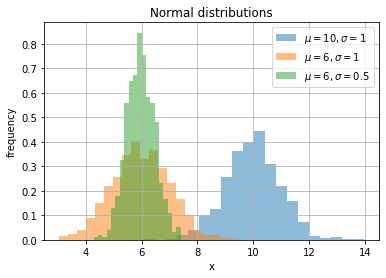

In [18]:
# Generate an array of n random numbers from a Normal distribution of mean mu, variance sigma. 
mu1, sigma1 = 10, 1
n1 = np.random.normal(mu1, sigma1, 1000)
plt.hist(n1, bins=20, density=True, alpha=0.5, label='$\mu=10, \sigma=1$') # density=True normalizes the histogram

# Different mean.
mu2, sigma2 = 6, 1
n2 = np.random.normal(mu2, sigma2, 1000)
plt.hist(n2, bins=20, density=True, alpha=0.5, label='$\mu=6, \sigma=1$')

# Different sigma.
sigma3 = 0.5
n3 = np.random.normal(mu2, sigma3, 1000)
plt.hist(n3, bins=20, density=True, alpha=0.5, label='$\mu=6, \sigma=0.5$')

plt.xlabel('x')
plt.ylabel('frequency')
plt.title('Normal distributions')
plt.legend()
plt.grid()

We can plot the probability density function for this distribution on top of the histogram of values. The probability density function (PDF) is a mathematical function describing the probability that a particular value will occur. It describes the population from which the sample values are drawn. As larger numbers of samples are generated, the resulting histogram of sample values more closely resembles the PDF. The PDF for a normal distribution of a variable $x$ (mean $\mu$, standard deviation $\sigma$) is given by:
$$f(x;\sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2/(2\sigma^2)}$$

mean: 10  standard deviation: 1


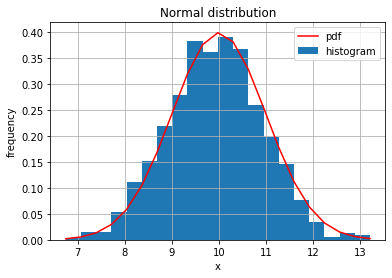

In [19]:
# Generate the sample values.
n1 = np.random.normal(mu1, sigma1, 1000)
count, bins, ignored = plt.hist(n1, 20, density=True, label='histogram')

# Calculate the PDF over same range. 
# density=True above allows comparison with pdf as area under curve normalized.
norm_pdf = lambda mu, s, x: 1/(s * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * s**2) )
plt.plot(bins, norm_pdf(mu1, sigma1, bins), color='r', label='pdf')

plt.title('Normal distribution')
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend()
plt.grid()

print("mean:", mu1, " standard deviation:", sigma1)

### 4.2 The binomial distribution

*numpy.random.binomial(n,p,size=None)*

This function generates random samples from a binomial distribution, which describes the probability of obtaining a number of success from *n* trials. *n* is an integer with $n \geq 0$ and *p* is the probability of success for each trial; it lies in the interval [0,1]. The flipping of a fair coin can be simulated with this function: the result of one flip doesn't influence any of the others, and for each flip there is a 50% chance of a head (and therefore a 50% chance of a tail because the sum of probabilities for all possible outcomes must equal 1). The variables in a binomial distribution can only have discrete values (H or T for example). A binomial experiment must have:

- repeated trials,
- two possible outcomes for each trial,
- the probability of success is constant,
- all trials are independent.

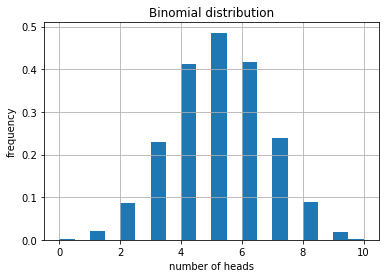

In [20]:
# Flip a fair coin 10 times. 
p, n = 0.5, 10

# Repeat the test many times.
rep = 10000

b1 = np.random.binomial(n, p, rep)
count, bins, ignored = plt.hist(b1, 20, density=True, label='histogram')
#plt.hist(b1)
plt.xlabel('number of heads')
plt.ylabel('frequency')
plt.title('Binomial distribution')
plt.grid()

What does this histogram tell us? That if we do an experiment to flip a fair coin a fixed number of times, and repeat the trial many times, the most likely outcome is heads half the time. How often does that actually occur? We can use the PDF to calculate the probability of obtaining a specified number (x) of heads out of n flips.
$$P(x) = \frac{n!}{x!(n-x)!} p^x (1-p)^{n-x}$$

In [21]:
# In our experiment count how many times 5 heads actually occurs.
print("For {} trials, probability {}, repeated {} times:".format(n, p, rep))
h = 5
sum(np.random.binomial(n, p, rep) == h)/rep

For 10 trials, probability 0.5, repeated 10000 times:


0.2468

In [22]:
# What do we expect from pdf above?
print("P(5 heads) = ")
(m.factorial(n)/(m.factorial(h) * m.factorial(n - h))) * (p ** h) * (1-p) ** h

P(5 heads) = 


0.24609375

I found an interesting example of the binomial distribution used to model call centre performance. The following code is adapted from https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

Average sales/employee 1: 2.009
Standard deviation in sales/employee 1: 1.4229964862922186
Average sales/employee 2: 3.555
Standard deviation in sales/employee 2: 1.8576800047370916


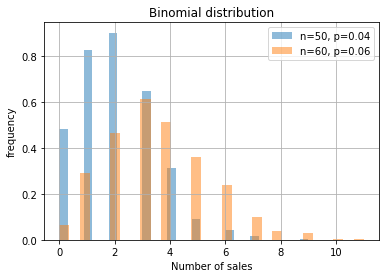

In [23]:
# Average number of calls an employee makes per day.
n1 = 50
# Probability per call of a successful sale.
p1 = 0.04
# Number of employees (or sample size).
emp = 1000
# Simulate the number of sales for our sample size.
sales1 = np.random.binomial(n1, p1, size=emp)
#count, bins, ignored = plt.hist(sales1, 30, density=True, label='histogram')
plt.xlabel('Number of sales')
plt.ylabel('frequency')
plt.title('Binomial distribution')
plt.grid()

# Average number of sales per employee.
print("Average sales/employee 1:", np.mean(sales1))
# Standard deviation in sales per employee
print("Standard deviation in sales/employee 1:", np.std(sales1))

# If we want to up the call centre sales rate, try:
n2, p2 = 60, 0.06
sales2 = np.random.binomial(n2, p2, size=emp)

# Average number of sales per employee.
print("Average sales/employee 2:", np.mean(sales2))
# Standard deviation in sales per employee
print("Standard deviation in sales/employee 2:", np.std(sales2))

count, bins, ignored = plt.hist(sales1, 30, alpha=0.5, density=True, label='n=50, p=0.04')
count, bins, ignored = plt.hist(sales2, 30, alpha=0.5, density=True, label='n=60, p=0.06')

plt.xlabel('Number of sales')
plt.ylabel('frequency')
plt.title('Binomial distribution')
plt.legend()
plt.grid()
plt.grid()

We could increase the number of sales per employee by increasing the number of calls each must make every day, or by increasing somehow the success rate per call, or by doing a combination of both. Above we show the effect of increasing the number of calls each employee makes per day by 20% and increasing the success rate per call by 50%. The histogram shifts to the right.

### 4.3 The exponential distribution

*numpy.random.exponential(scale=1, size=None)*

This function is used to generate an array (size) of random samples from an exponential distribution with specified scale parameter $\beta$. The scale parameter is the inverse of the rate parameter $\lambda$ which is sometimes used instead: $1/\beta = \lambda$. It is a continuous distribution used to model the time we must wait before a given event occurs. The PDF for an exponential distribution (for $x>0$), of scale factor $\beta$, is given by:
$$f(x) = \frac{1}{\beta} e^{-x/\beta}$$

The PDF of an exponential distribution has mean $\mu=\beta$ and variance $\sigma^2=\beta^2$

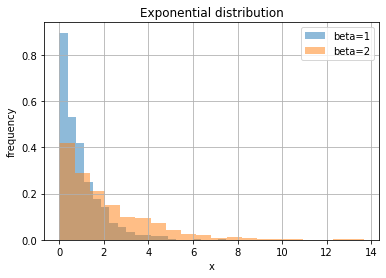

In [24]:
# 1000 samples from exp distribution with scale.
scale1, scale2 = 1, 2
e1 = np.random.exponential(scale1, 1000)
e2 = np.random.exponential(scale2, 1000)
count, bins, ignored = plt.hist(e1, 20, alpha=0.5, density=True, label='beta=1')
count, bins, ignored = plt.hist(e2, 20, alpha=0.5, density=True, label='beta=2')
#plt.hist(e1, alpha=0.3, label='scale1')
#plt.hist(e2, alpha=0.5, label='scale2')
plt.title('Exponential distribution')
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend()
plt.grid()

From this plot we can see that the scale factor determines how quickly the frequency of larger values of x falls towards zero. This means that if we generate a random sample from an exponential distribution, most of the numbers in our sample will be close to zero, and we are less likely to see large numbers. The scale factor determines how much less likely we are to see those larger numbers. This distribution has it's largest value at $x=0$ because $e^0 = 1$. At $x=\beta$, the PDF falls to ~ $1/3$ of its maximum value.

This distribution is often used to model waiting times between events. For example, if a computer part last 10 years on average, and the lifetime of that part is exponentially distributed, we can simulate the expected lifetime in years (x) of that computer part. The code is adapted from: https://courses.lumenlearning.com/introstats1/chapter/the-exponential-distribution/

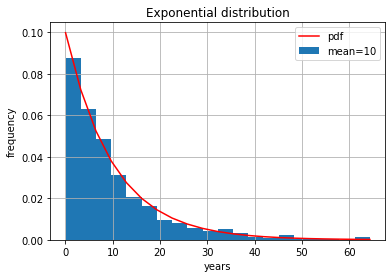

In [25]:
# Lifetime of computer parts. 
# density=True above allows comparison with pdf

# Mean lifetime of part in years.
scale3 = 10
# Number of parts to test.
batch = 1000

e3 = np.random.exponential(scale3, batch)
count, bins, ignored = plt.hist(e3, 20, density=True, label='mean=10')

# Calculate theoretical lifetime probability.
exp_pdf = lambda s, x: (1 / s ) * np.exp( - (x / s) )
plt.plot(bins, exp_pdf(scale3, bins), color='r', label='pdf')

plt.title('Exponential distribution')
plt.xlabel('years')
plt.ylabel('frequency')
plt.legend()
plt.grid()

We can use the cumulative density function (CDF) to estimate the probability of a part lasting a particular number of years. The CDF is the probability of x to be less than or equal to some value. For the exponential distribution it is given by:
$$F(x;\beta) = 1 - e^{-x/\beta}$$

In [26]:
# Probability that a part lasts x years or less is the area under the PDF to left of x.
# Check probability of part lasting x years or less.
x = 5
pxlt = 1 - np.exp(-1 * x / scale3) # CDF for exponential distribution.
print( "Probability of part lasting", x, "years or less is",pxlt)

# Therefore, probability that part lasts MORE than x years.
pxgt = 1 - pxlt
print( "Probability of part lasting more than", x, "years is",pxgt)

Probability of part lasting 5 years or less is 0.3934693402873666
Probability of part lasting more than 5 years is 0.6065306597126334


In [27]:
# Probability that a part lasts between y1 and y2 years, y1 < y2?
y1, y2 = 5, 10

# Answer is (prob of lasting < y2) -  (prob of lasting < y1)
prob = 1 - np.exp(-1 * y2 / scale3) - (1 - np.exp(-1 * y1 / scale3))
print(prob)

0.2386512185411911


### 4.4 The Rayleigh distribution

*numpy.random.rayleigh(scale=1.0, size=None)*

Generate samples from a Rayleigh distribution with scale s (default value = 1). It is defined for x and s both $ \geq 0$. It is a continuous PDF given by:

$$ f(x; s) = \frac{x}{s^2} e^{-x^2/2 s^2}$$

The mean and variance of this distribution are calculated from the scale factor: $\mu = \sqrt{\pi / 2} s$ and $\sigma^2 = (4 - \pi)/2 s^2$. This results in $\mu \approx 1.25 s$ and $\sigma^2 \approx 0.43 s$. The mode of a distribution is the value that occurs most often. In a symmetrical distribution the mode, mean, and median all coincide. The Rayleigh distribution is not symmetrical, so the mode is equal to the scale. 

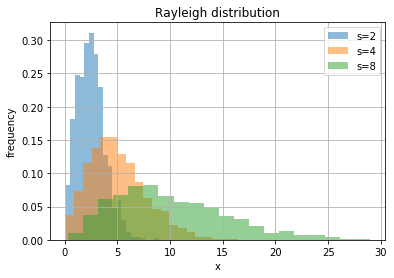

In [28]:
# Draw samples from a Rayleigh distribution.
sc1, sc2, sc3 = 2, 4, 8
r1 = np.random.rayleigh(sc1, 1000)
count, bins, ignored = plt.hist(r1, 20, alpha=0.5, density=True, label='s=2')

r2 = np.random.rayleigh(sc2, 1000)
count, bins, ignored = plt.hist(r2, 20, alpha=0.5, density=True, label='s=4')

r3 = np.random.rayleigh(sc3, 1000)
count, bins, ignored = plt.hist(r3, 20, alpha=0.5, density=True, label='s=8')

plt.title('Rayleigh distribution')
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend()
plt.grid()

What can we say from these histograms? Note the peak of the distribution shifts to the right as the scale increases.

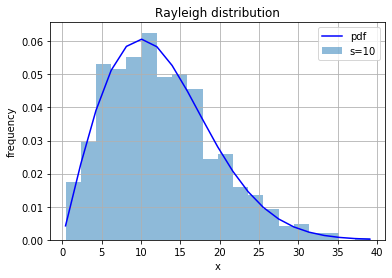

In [29]:
sc4 = 10
r4 = np.random.rayleigh(sc4, 1000)
count, bins, ignored = plt.hist(r4, 20, alpha=0.5, density=True, label='s=10')

# Generate theoretical PDF.
ray_pdf = lambda s, x: (x / s ** 2) * ( np.exp( (-x **2) / (2 * s **2) )  )
plt.plot(bins, ray_pdf(sc4, bins), color='b', label='pdf')

plt.title('Rayleigh distribution')
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend()
plt.grid()

In [30]:
# Quick example

### 4.5 The logistic distribution

*numpy.random.logistic(loc=0.0, scale=1.0, size=None)*

Generate samples from a logistic distribution, where loc is the mean of the distribution ($\mu$) and scale is the standard deviation or spread ($\sigma$). Default values are assumed if none provided. It is a continuous PDF given by:

$$ P(x) = \frac{ e^{-(x - \mu)/\sigma} }{\sigma (1 + e^{-(x - \mu)/\sigma})^2} $$

Used for...logistic regression ML
Mean etc.
Easier to calculate CDF thatn for normal - which it is like but with higher tails.

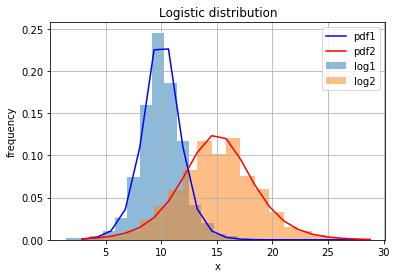

In [31]:
# Draw samples from a logistic distribution.
loc1, s1 = 10, 1
l1 = np.random.logistic(loc1, s1, 1000)
count, bins, ignored = plt.hist(l1, 20, alpha=0.5, density=True, label='log1')

# Draw samples from a logistic distribution.
loc2, s2 = 15, 2
l2 = np.random.logistic(loc2, s2, 1000)
count, bins, ignored = plt.hist(l2, 20, alpha=0.5, density=True, label='log2')

# Calculate theoretical probability density in each case.
log_pdf = lambda m, s, x: (np.exp(- (x - m) / s ) ) / ( s * ( 1 +  (np.exp(- (x - m) / s ) ) ) ** 2 )
plt.plot(bins, log_pdf(loc1, s1, bins), color='b', label='pdf1')
plt.plot(bins, log_pdf(loc2, s2, bins), color='r', label='pdf2')

plt.title('Logistic distribution')
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend()
plt.grid()

***
## 5. The use of seeds in generating pseudorandom numbers

Why do we refer to the random numbers generated in a computer as pseudorandom rather than just random? We do so because these numbers are generated by an algorithm, and if the seed used to initialize that algorithm is known, then it is possible to predict the behavior of the pseudorandom number generator. The README contains a brief discussion on this. The four functions in this part of the package are:

- RandomState
- seed (called when RandomState is initialized)
- get_state
- set_state

*numpy.random.seed(seed=None)*

This function seeds the pseudorandom number generator. It must be convertible to 32-bit unsigned integers. We will use it in the next code cell, where we want to show that setting a seed guarantees the same "randomness" every time. 

*numpy.random.RandomState(seed=None)*

The numpy.random documentation states that this is the container for the Mersenne Twister pseudorandom number generator. *seed* is the random seed used for initialization. It can be any integer (or array of integers) between $0$ and $2^{32} - 1$ inclusive. If seed is None (the default value), then RandomState will try to read data from /dev/urandom (or the Windows analogue) if available, or seed from the computer clock otherwise. It wasn't immediately clear to me how to use this function, but I found a stackoverflow post (reference in README) which explains it well. Basically, one can create a RandomState object and use its methods OR use numpy.random functions. 

In [32]:
# No seed set yet.
# Create an instance of the RandomState class.
R1 = np.random.RandomState()
print(R1.rand())

# Comapre with rand() function. Should be different.
f = np.random.rand()
print(f)

0.05316093566814739
0.3535253136298767


In [33]:
# Adapted from https://stackoverflow.com/questions/32462273/how-to-use-random-randomstate
# Now set the seed.

# Number I want as my seed.
begin = 3

# Create a RandomState object with seed = begin.
R2 = np.random.RandomState(begin)
# Now call one of the RandomState methods with that seed.
print("RandomState (method, seed) = (rand, 1): ", R2.rand())

# Should produce the EXACT same result as:

# Set the seed value.
np.random.seed(begin)
# Call numpy.random rand function.
rm = np.random.rand()
print("rand(): ", rm)

RandomState (method, seed) = (rand, 1):  0.5507979025745755
rand():  0.5507979025745755


We can also generate random numbers from distributions using both methods. The lists will be identical if the seed is set to be the same for both.

In [34]:
# Generate a list of 5 random numners from a normal distribution.
# Seed unchanged from last cell

# Using RandomState
print("RandomState: ", R2.randn(5))

# Using randn() function  
print("randn(): ", np.random.randn(5))


RandomState:  [-1.02947147  1.0248068   0.98055387  0.02701904 -0.46004212]
randn():  [-1.02947147  1.0248068   0.98055387  0.02701904 -0.46004212]


*numpy.random.get_state()* Returns a tuple representing the internal state of the generator.

*numpy.random.set_state(state)* Sets the internal state of the generator from a tuple state.

The documentation warns against manually re-setting the internal state. The tuple (ordered and unchangable list) contains the following items:
1. the string ‘MT19937’.
2. a 1-D array of 624 unsigned integer keys.
3. an integer pos.
4. an integer has_gauss.
5. a float cached_gaussian.


In [35]:
# Get the internal state of the Mersenne generator.
np.random.get_state()

('MT19937', array([2266350226,  522119106, 3046352735,  732669494, 2548320174,
        3088851727, 1309173820,  991244764, 1708698958, 3598568018,
        1522424413, 3319010522,  417668947, 3981672031, 3438823488,
        1769258719, 3818296302, 1993615070, 2466305996, 3248750108,
        2040561877, 3246834632, 1706535662, 3866725823,  354717793,
        3217406305,  841786775, 2651604212,  551238198, 1232752911,
        4028149703, 2133296956, 3293934618, 3522657645,  339605832,
        4090971106, 1746340915, 4067629259, 3943922704, 2719897163,
        1366782294, 2428482183,   71013814, 3425765969, 3059041190,
        3736136450,  350928037, 3971790501, 2149477175, 1834860734,
          25994155, 1663570273, 1025783352, 1542612516, 3141617987,
        2502391288, 2096747259, 1704991238, 2485663908, 4215245268,
        2229428262, 3199500869, 2207455581, 3996292611, 4273457649,
         909711631, 1376339482, 3378471313, 1982377115, 4066602342,
        1561471259, 1529235723, 35817

Above we see the string MT19937, an array containing 624 integer keys, an integer representing *pos*, an integer representing *has_gauss*, and a float representing *cached_gaussian*. The seed itself is not one of the random numbers, it's just used to initialize the Mersenne twister algorithm. It can be useful to set the seed when testing code, so that any differences observed from run to run are not due to the random numbers generated. For example, one might want to draw random samples from a uniform distribution and perform some calculations. If the random sample changes on each execution of the code, it would be more difficult to debug. Be aware that np.random.seed() is not thread safe, so it's not guaranteed to work if two different threads are executing the function at the same time. This warning appears in several of the references listed in the README. I'm not going to play around with *set_state()*.

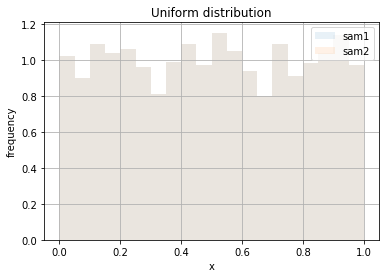

In [36]:
# Set the seed before each call to the function to ensure identical "random" samples.
np.random.seed(27)
sam1 = np.random.uniform(size=2000)
# print(sam1)

np.random.seed(27)
sam2 = np.random.uniform(size=2000)
# print(sam2)

count, bins, ignored = plt.hist(sam1, 20, alpha=0.1, density=True, label='sam1')
count, bins, ignored = plt.hist(sam2, 20, alpha=0.1, density=True, label='sam2')
plt.title('Uniform distribution')
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend()
plt.grid()

We can't distinguish between the two samples in the plot.

## The End